In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob, os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as ticker

In [2]:
#Importing & Cleansing Dataset for Assignment Part 1A

ds1a_path=r'Input_File_path'
ds1a_data=glob.glob(ds1a_path + "/*.csv")

# Generating Loop, assuming multiple input files 
for fn in ds1a_data:
    #Input Each File in path as pandas Dataframe
    
    ds1a_df = pd.read_csv(fn, index_col=None, header=0)
    
    #Identify Columns with all NA Values & Eliminate the Column
    
    for col in ds1a_df:
        if(ds1a_df[col].count()==0):
            ds1a_df=ds1a_df.drop(col,axis=1)


# Creating a list of states,Eliminating all the UTs

state_list=[col for col in ds1a_df.columns if col not in ['Chandigarh','Items  Description','Jammu & Kashmir','Puducherry','Delhi','Andaman & Nicobar Islands']]

# Filtering on Required Column Data
ds1a_group = ds1a_df[ds1a_df['Items  Description'] == '(% Growth over previous year)' ]

# Populating NaN with Min values, since ignoring NA values eliminates data for other states for particular year. And also 
#  GDP of any given region cannot be set to 0, since it means that there was no production for that year, for that state.
ds1a_group=ds1a_group.fillna(ds1a_group.min())

#Generating Final Frame for Plotting
ds1a_final=ds1a_group[state_list]

# Standardizing Duration column into Year Format, for Slope Calculation
ds1a_final.iloc[:,0:1]=ds1a_final['Duration'].str.slice(stop=4).astype(int)



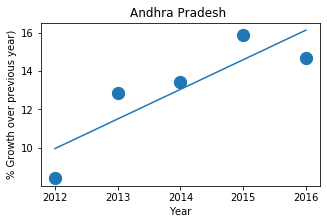

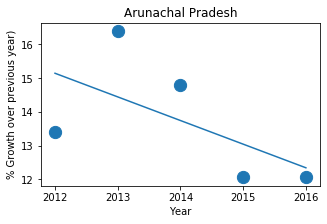

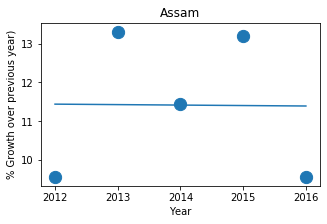

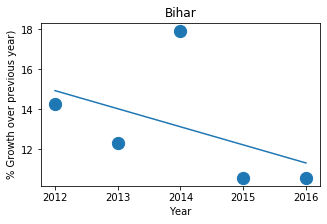

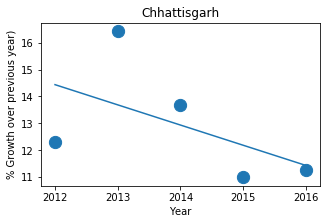

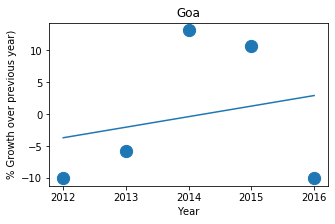

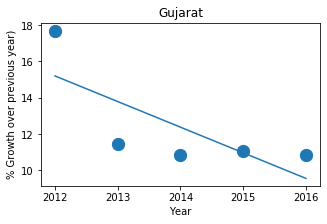

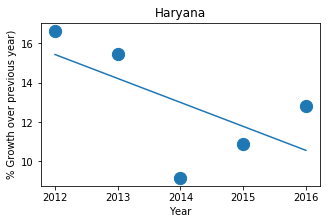

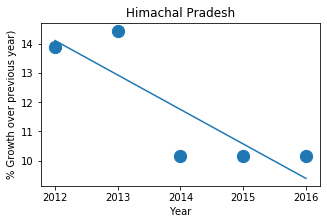

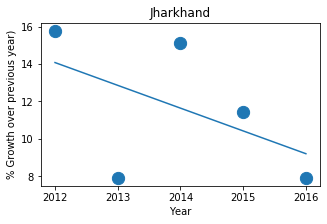

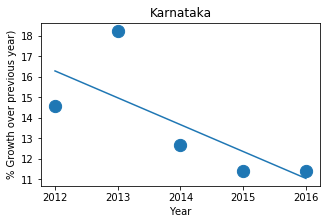

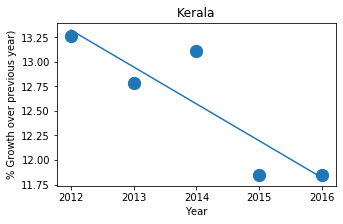

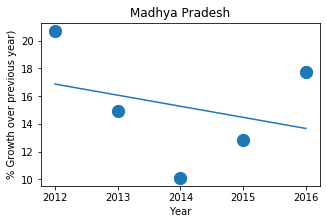

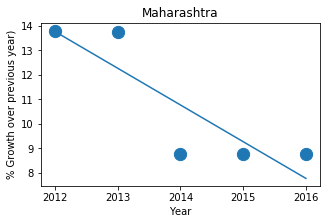

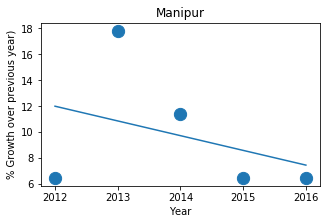

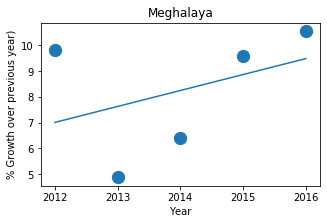

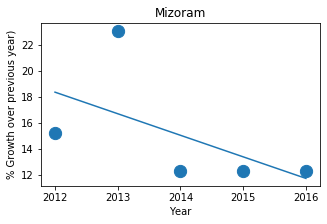

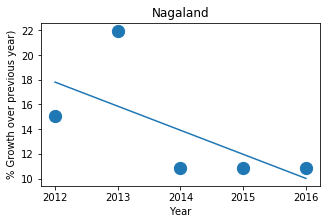

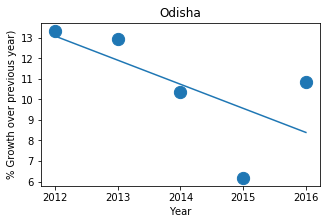

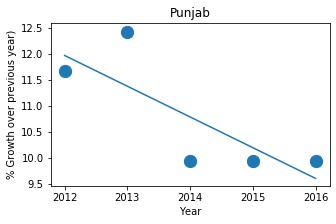

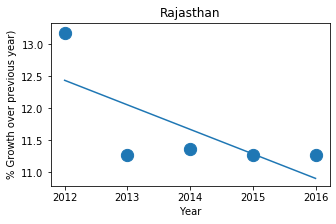

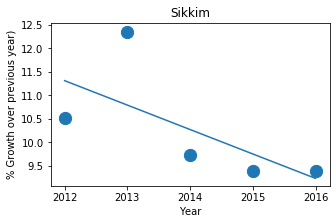

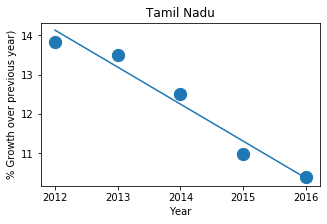

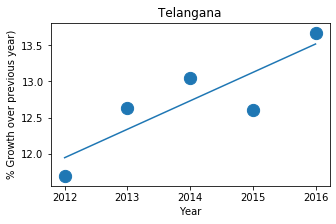

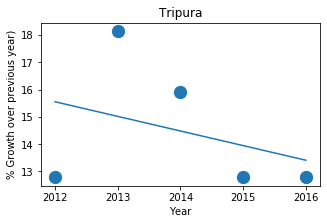

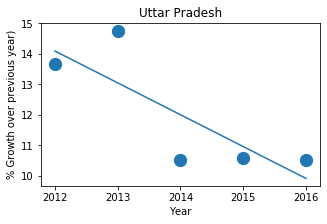

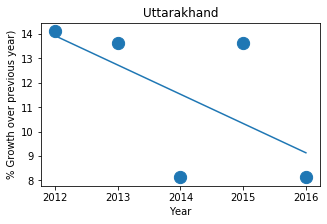

In [3]:
# Plotting Graphs, Scatter & Best Fit Line For Each State- Assignment 1A

for  col in ds1a_final:
    if col!='Duration' and col!='All_India GDP':
        np.polyfit(ds1a_final['Duration'], ds1a_final[col],1)
        m,c = np.polyfit(ds1a_final['Duration'], ds1a_final[col],1)
        plt.figure(figsize = (5,3))
        plt.scatter(x =ds1a_final['Duration'], y =col,s=150, data = ds1a_final)
        plt.plot(ds1a_final['Duration'], m*ds1a_final['Duration']+c ) 
        plt.ylabel('% Growth over previous year)')
        plt.xlabel('Year')
        plt.title(col)
        plt.xticks(np.arange(min(ds1a_final['Duration']), max(ds1a_final['Duration'])+1, 1.0))
        plt.show()

Average Nation's Growth Rate-  11.8


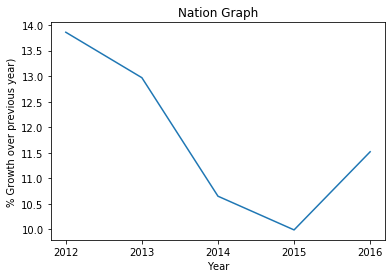

In [6]:
# Plotting Nation Graph & Nations Growth Rate- Assignment 1A
ds1a_final[['Duration','All_India GDP']]
plt.ylabel('% Growth over previous year)')
plt.xlabel('Year')
plt.title('Nation Graph')
plt.xticks(np.arange(min(ds1a_final['Duration']), max(ds1a_final['Duration'])+1, 1.0))
plt.plot('Duration','All_India GDP',data=ds1a_final[['Duration','All_India GDP']])
print('Average Nation\'s Growth Rate- ',round(ds1a_final['All_India GDP'].mean(),2))


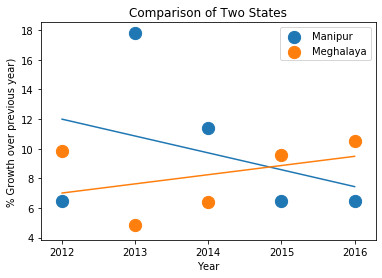

In [8]:
#Compare Two States- Assignment 1A

# Pulling in data for 2 Random States
#ds_ts_df=ds1a_final[['Duration','Gujarat','Arunachal Pradesh']]
ds_ts_df=ds1a_final[['Duration','Manipur','Meghalaya']]
ds_ts_df

# Plotting Graph
for  col in ds_ts_df:
    if col!='Duration':
        np.polyfit(ds_ts_df['Duration'], ds_ts_df[col],1)
        m,c = np.polyfit(ds_ts_df['Duration'], ds_ts_df[col],1)
        plt.scatter(x =ds_ts_df['Duration'], y =col,s=150, data = ds1a_final)
        plt.plot(ds_ts_df['Duration'], m*ds_ts_df['Duration']+c ,) 
        plt.ylabel('% Growth over previous year)')
        plt.xlabel('Year')
        plt.title('Comparison of Two States')
        plt.legend()
        plt.xticks(np.arange(min(ds1a_final['Duration']), max(ds1a_final['Duration'])+1, 1.0))
        plt.plot()

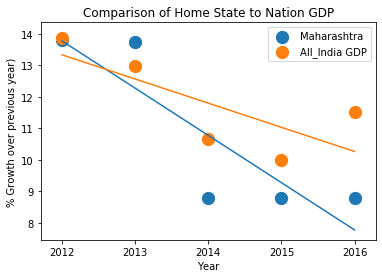

In [9]:
#comparison of Home State to Nation's GDP

df_homestate=ds1a_final[['Duration','Maharashtra','All_India GDP']]


# Plotting Graph
for  col in df_homestate:
    if col!='Duration':
        np.polyfit(df_homestate['Duration'], df_homestate[col],1)
        m,c = np.polyfit(df_homestate['Duration'], df_homestate[col],1)
        plt.scatter(x =df_homestate['Duration'], y =col,s=150, data = df_homestate)
        plt.plot(df_homestate['Duration'], m*df_homestate['Duration']+c ) 
        plt.ylabel('% Growth over previous year)')
        plt.xlabel('Year')
        plt.title('Comparison of Home State to Nation GDP')
        plt.legend()
        plt.xticks(np.arange(min(df_homestate['Duration']), max(df_homestate['Duration'])+1, 1.0))
        plt.plot()

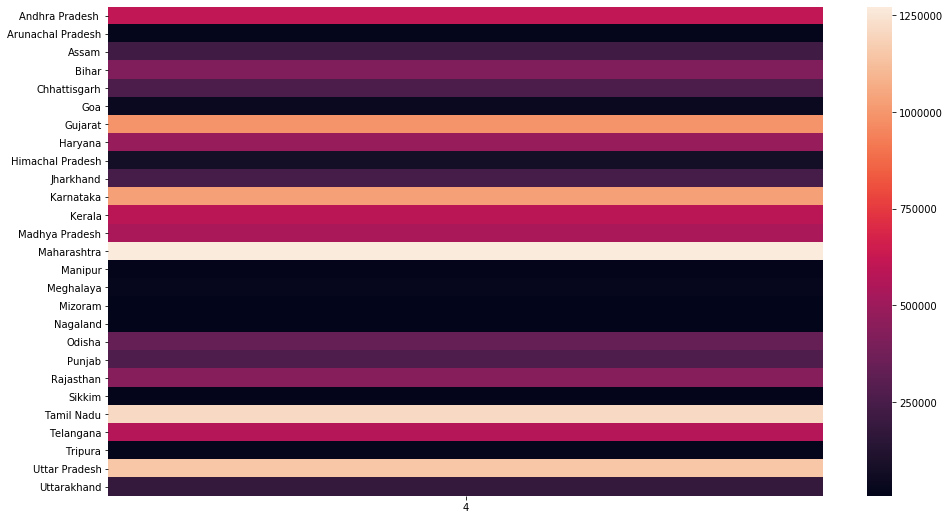

In [5]:
#Total GDP of States for 15-16

# Filtering on Required Column Data

ds1a_total_df = ds1a_df[(ds1a_df['Items  Description'] == 'GSDP - CURRENT PRICES (` in Crore)') ]
ds1a_total_df=ds1a_total_df.fillna(ds1a_total_df.min())
ds1a_total_df=ds1a_total_df[(ds1a_df['Duration'] == '2015-16')]
state_list = [lst for lst in state_list if lst not in ('Duration','All_India GDP')]

plt.figure(figsize = (16,9))
sns.heatmap(ds1a_total_df[state_list].transpose(),  annot_kws={"size": 1},xticklabels=True, yticklabels=True)


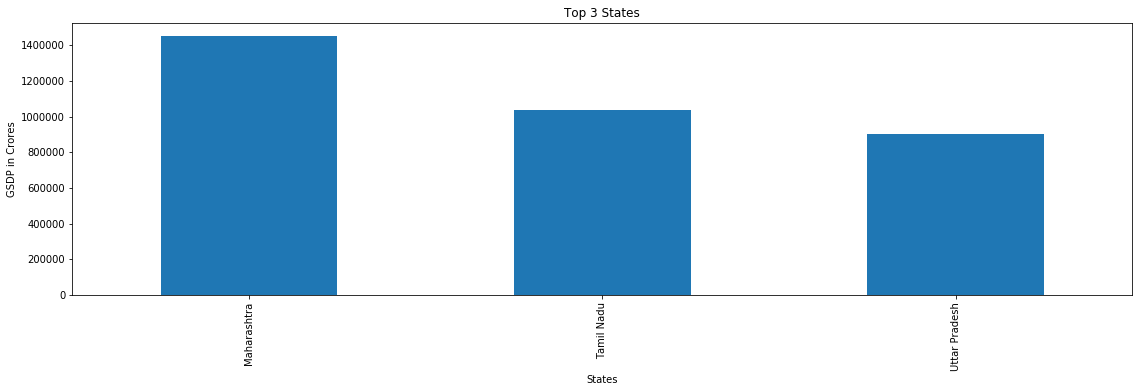

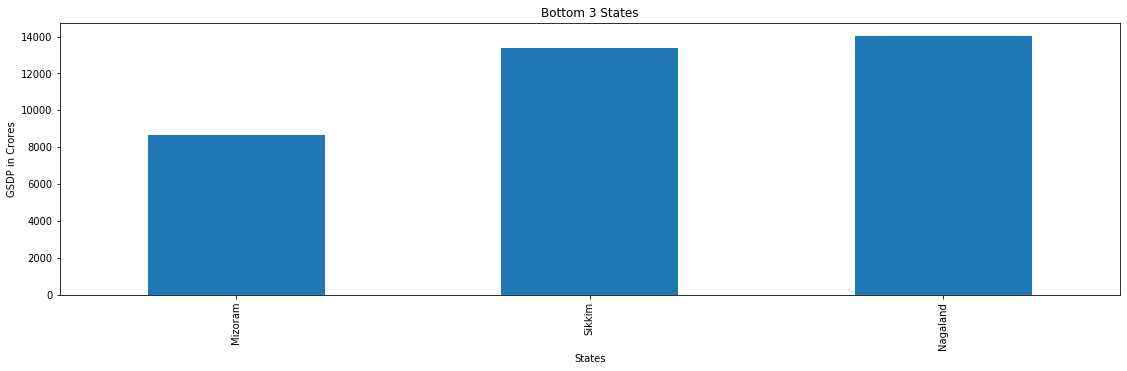

In [66]:
#Top 3/Bottom 3 States based on Total GDP

ds1a_t3_b3=ds1a_df[(ds1a_df['Items  Description'] == 'GSDP - CURRENT PRICES (` in Crore)') ]
ds1a_t3_b3=ds1a_t3_b3.fillna(ds1a_t3_b3.min())


remove_col=[col for col in ds1a_df.columns if col not in ['Duration','All_India GDP']]

plot_df=round(ds1a_t3_b3[remove_col][state_list].mean().astype(float),2)



plot_df_t3=plot_df.sort_values(ascending=False).nlargest(3)
plot_df_b3=plot_df.sort_values(ascending=False).nsmallest(3)


plt.figure(figsize = (19,5))
plt.ylabel('GSDP in Crores')
plt.xlabel('States')
plt.title('Top 3 States')
plot_df_t3.plot.bar(x='State', y='GSDP - CURRENT PRICES (` in Crore)')

plt.figure(figsize = (19,5))

plt.ylabel('GSDP in Crores')
plt.xlabel('States')
plt.title('Bottom 3 States')
plot_df_b3.plot.bar(x='State', y='GSDP - CURRENT PRICES (` in Crore)')


In [72]:
#Load Data for Data 1B
#Path where all the files are stored
path = r'C:\Users\Raviraj Kuber\Documents\IIITB\GDP Assignment\Dataset 1B' 
#Reading all the paths
all_files = glob.glob(path + "/*.csv")
#Empty list to add all the dataframes
li = []
#Loop to read each file with the path given in the filename variable.
for filename in all_files:
    # Reading each file as a pandas dataframe
    ds1b_df = pd.read_csv(filename, index_col=None, header=0,encoding = "ISO-8859-1")
    
    ds1b_df=ds1b_df.drop('S.No.',axis=1)
    
    
    # Selecting only required columns/Filtering for 2014-15 data
    ds1b_df = ds1b_df[['Item','2014-15']]
   
    # Transpose the data
    ds1b_df = ds1b_df.T

   
    
    # Taking the header row
    new_header = ds1b_df.iloc[0] #grab the first row for the header
    
    ds1b_df = ds1b_df[1:] #take the data less the header row
    # Assign the new header
   
    ds1b_df.columns = new_header
   
    # Add the section name from the filename
    ds1b_df.loc[:,'File'] = filename.split('\\')[-1].split('.')[0]
    ds1b_df.loc[:,'State']=filename.split('NAD-')[-1].split('-')[0].replace('_',' ')   
   
    # Append the final DF to the list
    li.append(ds1b_df)

ds1b_df_format = pd.concat(li, axis=0, ignore_index=True)


<Figure size 1440x1152 with 0 Axes>

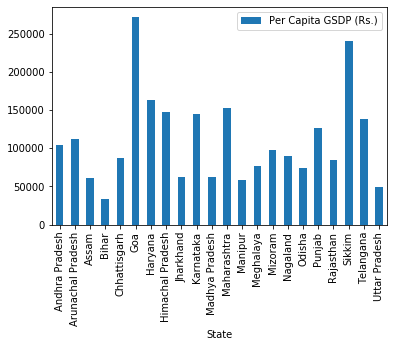

In [8]:
# GDP per capita for all states
ds_bar=ds1b_df_format[['State','Per Capita GSDP (Rs.)']]
plt.figure(figsize = (20,16))
ds_bar.plot.bar(x='State', y='Per Capita GSDP (Rs.)')

<Figure size 1152x648 with 0 Axes>

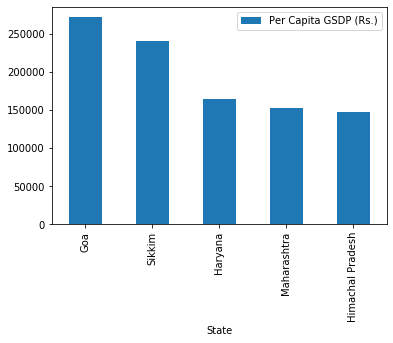

In [73]:
#Top 5 states as per GDP

ds1b_df_format[['State','Per Capita GSDP (Rs.)']].head(5)


top=ds1b_df_format[['State','Per Capita GSDP (Rs.)']].sort_values(by= ['Per Capita GSDP (Rs.)'], ascending = False).head(5)

plt.figure(figsize = (16,9))
top.plot.bar(x='State', y='Per Capita GSDP (Rs.)')

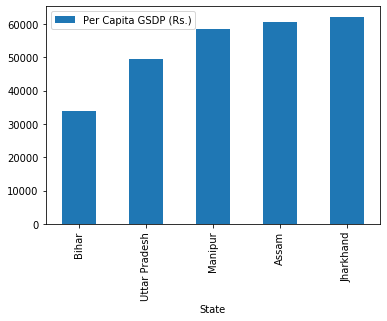

In [74]:
#Bottom  5 states as per GDP

ds1b_t5_b5=ds1b_df_format[['State','Per Capita GSDP (Rs.)']]

plt_t5=ds1b_t5_b5.sort_values(by= ['Per Capita GSDP (Rs.)']).head(5)

plt_t5.plot.bar(x='State', y='Per Capita GSDP (Rs.)')



([<matplotlib.axis.XTick at 0x1fc6e473f98>,
 <a list of 22 Text xticklabel objects>)

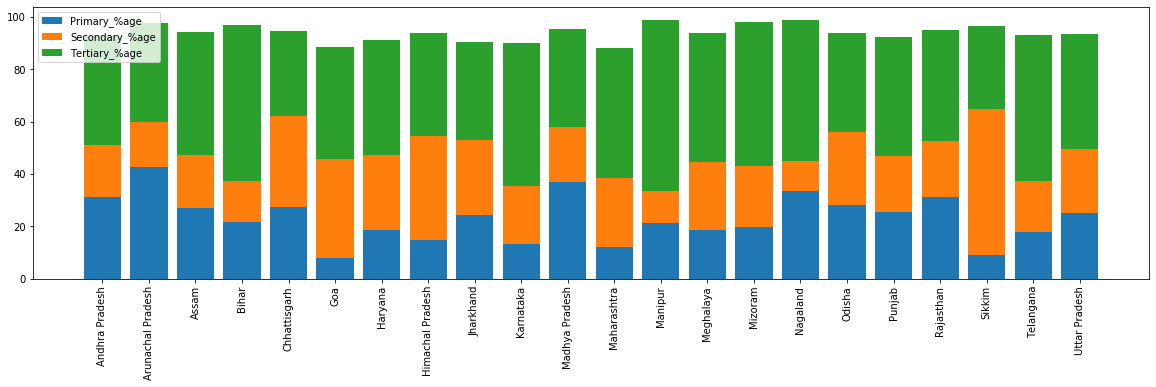

In [9]:
#Percentage Contribution of Primary, secondary & Tertiary Sector

calc1=ds1b_df_format[['State','Primary','Secondary','Tertiary','Gross State Domestic Product']]
f, (ax1) = plt.subplots(1, figsize=(20,5))
calc1['Primary_%age']=round((calc1['Primary']/calc1['Gross State Domestic Product'] *100).astype(float),2)
calc1['Secondary_%age']=round((calc1['Secondary']/calc1['Gross State Domestic Product'] *100).astype(float),2)
calc1['Tertiary_%age']=round((calc1['Tertiary']/calc1['Gross State Domestic Product'] *100).astype(float),2)

p1=calc1['Primary_%age']
s1=calc1['Secondary_%age']
t1=calc1['Tertiary_%age']



ax1.bar(range(len(p1)), p1, label='Primary')
ax1.bar(range(len(s1)), s1, bottom=p1, label='Secondary')
ax1.bar(range(len(t1)), t1, bottom=np.array(p1)+np.array(s1),label='Tertiary')
ax1.set_xticks(np.arange(len(calc1['State'])))
ax1.set_xticklabels(calc1['State'])
locs, labels=plt.xticks()
plt.legend(calc1[['Primary_%age','Secondary_%age','Tertiary_%age']],loc=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.xticks(locs,calc1['State'],rotation=90)


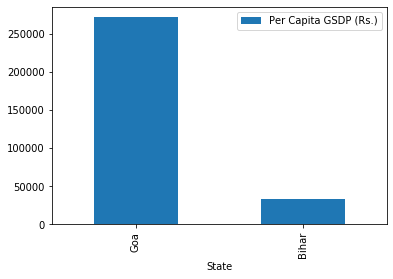

In [22]:
# Ratio of highest to lowest per capita GDP
df_ratio=ds1b_t3_b3.sort_values(by= ['Per Capita GSDP (Rs.)'], ascending = False).head(1)
df_ratio=df_ratio.append(ds1b_t3_b3.sort_values(by= ['Per Capita GSDP (Rs.)'], ascending = False).tail(1))

df_ratio.plot.bar(x='State', y='Per Capita GSDP (Rs.)')

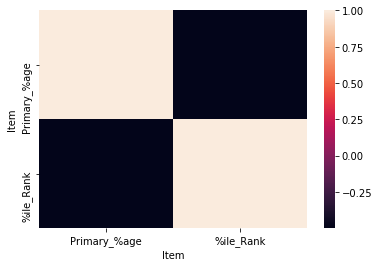

In [79]:
#Correlation between GDP & %ile
 #Add %ile Rank
ds1b_df_format.loc[:,'%ile_Rank']=round(ds1b_df_format['Per Capita GSDP (Rs.)'].rank(pct=True),2)

#Adding %age Contributions of each sector
ds1b_df_format.loc[:,'Primary_%age']=round((ds1b_df_format['Primary']/ds1b_df_format['Gross State Domestic Product'] ).astype(float),2)
ds1b_df_format.loc[:,'Secondary_%age']=round((ds1b_df_format['Secondary']/ds1b_df_format['Gross State Domestic Product'] ).astype(float),2)
ds1b_df_format.loc[:,'Tertiary_%age']=round((ds1b_df_format['Tertiary']/ds1b_df_format['Gross State Domestic Product'] ).astype(float),2)


df1=ds1b_df_format[['State','Primary_%age','%ile_Rank']]

corr=df1.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)

In [83]:
# Quantile Calculation & categorizing States into c1,c2,c3,c4.

qc4=ds1b_df_format['Per Capita GSDP (Rs.)'].quantile(.2)
qc3=ds1b_df_format['Per Capita GSDP (Rs.)'].quantile(.5)
qc2=ds1b_df_format['Per Capita GSDP (Rs.)'].quantile(.85)
qc1=ds1b_df_format['Per Capita GSDP (Rs.)'].quantile(1)

ds1b_df_format['Category']=''

ds1b_df_format.loc[(ds1b_df_format['Per Capita GSDP (Rs.)'] <=qc1) & (ds1b_df_format['Per Capita GSDP (Rs.)']>qc2), 'Category'] = 'C1'
ds1b_df_format.loc[(ds1b_df_format['Per Capita GSDP (Rs.)'] <=qc2) & (ds1b_df_format['Per Capita GSDP (Rs.)']>qc3), 'Category'] = 'C2'
ds1b_df_format.loc[(ds1b_df_format['Per Capita GSDP (Rs.)'] <=qc3) & (ds1b_df_format['Per Capita GSDP (Rs.)']>qc4), 'Category'] = 'C3'
ds1b_df_format.loc[(ds1b_df_format['Per Capita GSDP (Rs.)'] <qc4), 'Category'] = 'C4'


ds1b_c1=ds1b_df_format[(ds1b_df_format['Category'] == 'C1') ]
ds1b_c1_final=ds1b_c1[['State','Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services',
                       'Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services'
                      ,'Real estate, ownership of dwelling & professional services','Public administration','Other services','Gross State Domestic Product']]

ds1b_c2=ds1b_df_format[(ds1b_df_format['Category'] == 'C2') ]
ds1b_c2_final=ds1b_c2[['State','Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services',
                       'Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services'
                      ,'Real estate, ownership of dwelling & professional services','Public administration','Other services','Gross State Domestic Product']]


ds1b_c3=ds1b_df_format[(ds1b_df_format['Category'] == 'C3') ]
ds1b_c3_final=ds1b_c3[['State','Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services',
                       'Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services'
                      ,'Real estate, ownership of dwelling & professional services','Public administration','Other services','Gross State Domestic Product']]




ds1b_c4=ds1b_df_format[(ds1b_df_format['Category'] == 'C4') ]
ds1b_c4_final=ds1b_c4[['State','Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services',
                       'Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services'
                      ,'Real estate, ownership of dwelling & professional services','Public administration','Other services','Gross State Domestic Product']]


In [84]:
#cateogrized States Dataframes

ds1b_c4_final
ds1b_c3_final
ds1b_c2_final
ds1b_c1_final


Item,State,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
2,Assam,3855548,1471149,2002936,296587,1733568,2987155,1194568,543651,1412466,1373611,1795658,19809800
3,Bihar,7951890,68107,2189965,345168,3449763,7448373,3147173,1178022,3740641,2078171,4587589,37391988
8,Jharkhand,3211065,2037289,4114148,337489,1789834,1991359,1470022,551441,1656784,1088325,1375410,21710718
12,Manipur,383140,NaN,49501,27490,143182,262950,109726,30315,159335,297078,317930,1.80428e+06
21,Uttar Pradesh,25097754,901501,12261649,2030625,11256450,9437243,7404509,3392275,14548185,6152124,5034623,104337115


In [80]:
# Assignment Part-II


#Importing & Cleansing Dataset for Assignment Part 1A

ds2_path=r'C:\Users\Raviraj Kuber\Documents\IIITB\GDP Assignment\Dataset2\datafile.xls'
#ds2_data=glob.glob(ds2_path + "/*.xls")

ds2_df_excel=pd.read_excel(ds2_path)

#dropping all UT
ds2_df_excel=ds2_df_excel.drop(ds2_df_excel[ds2_df_excel['Level of Education - State'].isin(["A & N Islands","Chandigarh","Jammu and Kashmir","Daman & Diu","Dadra & Nagar Haveli"
                                               ,"Lakshadweep","Puducherry"])].index)


#Rename Column to State, for merge
ds2_df_excel=ds2_df_excel.rename(columns={'Level of Education - State':'State'})

#Merging Datasets of 1b & 2
df_excel_merge=pd.merge(ds1b_df_format,ds2_df_excel,on='State')


#Getting Required columns & Standardizing %age values.
df_excel_merge=df_excel_merge[['State','Per Capita GSDP (Rs.)','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015'
                               ,'Primary_%age','Secondary_%age','Tertiary_%age']]


df_excel_merge['Primary_%age']=df_excel_merge['Primary_%age']*100
df_excel_merge['Secondary_%age']=df_excel_merge['Secondary_%age']*100
df_excel_merge['Tertiary_%age']=df_excel_merge['Tertiary_%age']*100





WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


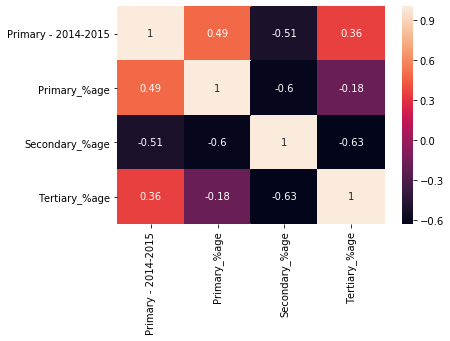

In [323]:
#Co-Relation Heatmaps

#1) Primary Drop Rate

df_primary_dropout=df_excel_merge[['State','Primary - 2014-2015','Primary_%age','Secondary_%age','Tertiary_%age']]

corr_primary=df_primary_dropout.corr()
sns.heatmap(corr_primary, xticklabels=corr_primary.columns,yticklabels=corr_primary.columns,annot=True)

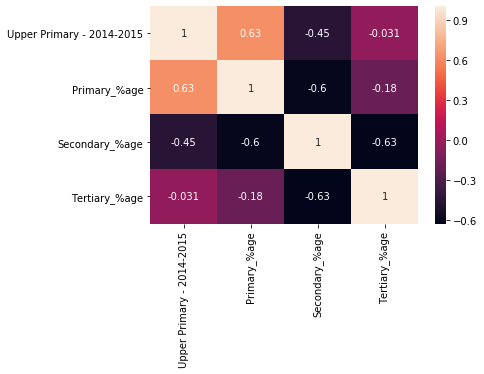

In [262]:
#Co-Relation Heatmaps

#2) Upper Primary Drop Rate

df_upper_primary_dropout=df_excel_merge[['State','Upper Primary - 2014-2015','Primary_%age','Secondary_%age','Tertiary_%age']]

corr_upper_primary=df_upper_primary_dropout.corr()
sns.heatmap(corr_upper_primary, xticklabels=corr_upper_primary.columns,yticklabels=corr_upper_primary.columns, annot=True)

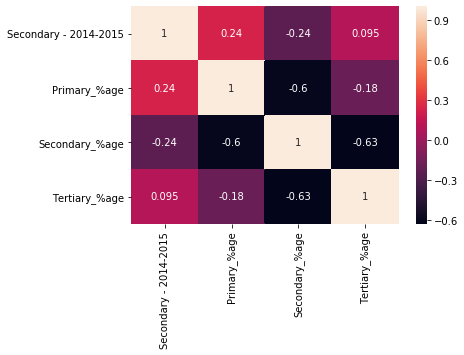

In [320]:
#Co-Relation Heatmaps

#3) Secondary Drop Rate

df_secon_dropout=df_excel_merge[['State','Secondary - 2014-2015','Primary_%age','Secondary_%age','Tertiary_%age']]

corr_secondary=df_secon_dropout.corr()
sns.heatmap(corr_secondary, xticklabels=corr_secondary.columns,yticklabels=corr_secondary.columns, annot=True)

In [81]:
#Population Correlation Heatmap

#Renaming Column to StandardValue
ds1b_df_format.columns.values[31] = "Population"

#Merging Datasets to get required columns
df2_popu_merge=pd.merge(df_excel_merge,ds1b_df_format,on='State')


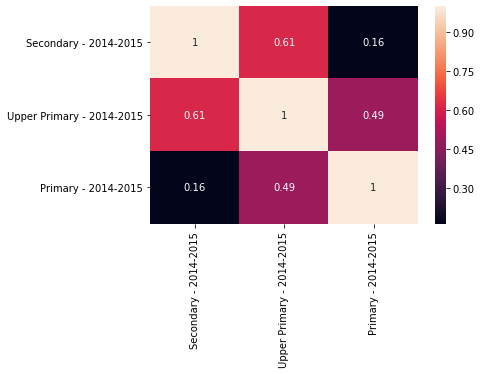

In [82]:
#Co-Relation Heatmaps- Population

df_secon_dropout1=df2_popu_merge[['Population','Secondary - 2014-2015','Upper Primary - 2014-2015','Primary - 2014-2015']]

corr_secondary1=df_secon_dropout1.corr()
sns.heatmap(corr_secondary1, xticklabels=corr_secondary1.columns,yticklabels=corr_secondary1.columns, annot=True)